# Analyse des sentiments à l'aide de l'apprentissage profond

Dans ce projet, nous allons utiliser un ensemble de [données Kaggle](https://www.kaggle.com/kazanova/sentiment140) pour l'analyse des sentiments.

# Importation des données

Ajoutez un raccourci de ce dossier à votre google drive :

https://drive.google.com/drive/folders/1uj-BnUzSHJOHuojQ9q8q53DN0EGiPpcl?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Importation des packages

In [ ]:
from time import time
import numpy as np
import pandas as pd
import tensorflow as tf

# Import Regex to clean up tweets
import re

import nltk, string
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

# Get Reviews
import requests
import json

# Get Tweets
import httplib2
import requests
import urllib3
from drive.MyDrive.RNN_sentiment_dataset.random_tweets import *

# TF IDF Imports


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csc_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from joblib import dump, load

# RNN & LSTM Imports

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.sequence import pad_sequences
import random

random_tweets imported


# Import du dataframe

In [ ]:
DF = pd.read_csv('/content/drive/MyDrive/RNN_sentiment_dataset/tweets.csv',encoding='latin',usecols=[0, 5], # to take only 2 useful columns
                 names=["label","tweet"])

In [ ]:
DF.shape

(1600000, 2)

Dans ces données, nous avons y = 0 pour un sentiment négatif et y = 4 pour un sentiment positif.

Nous ne garderons que le sentiment positif et négatif et transformerons y pour obtenir 0 pour un sentiment négatif et 1 pour un sentiment positif.

In [ ]:
DF['label'].replace([4, 0],[1, 0], inplace=True) # Replace 0 and 4 by 0 and 1 to clarify

# Prétraitements

In [ ]:
  print(DF.head(25))
  len(DF)

Nous pouvons voir que les tweets contiennent des mentions, des urls, etc. qui ne sont pas utiles pour le modèle de langage.

Nous devons donc nettoyer leur contenu.

## Nettoyer les tweets

In [ ]:
tokenizer = TweetTokenizer(strip_handles=True)
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
corpus = []

Je crée une fonction pour nettoyer les tweets. Les contractions sont séparées, les caractères spéciaux sont supprimés, ainsi que les URL, les mentions, les mots trop courts et les mots vides.

In [ ]:
def clean(tweet):

    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)
    tweet = re.sub(r"donå«t", "do not", tweet)

    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"yrs", "years", tweet)
    tweet = re.sub(r"hrs", "hours", tweet)
    tweet = re.sub(r"2morow|2moro", "tomorrow", tweet)
    tweet = re.sub(r"2day", "today", tweet)
    tweet = re.sub(r"4got|4gotten", "forget", tweet)
    tweet = re.sub(r"b-day|bday", "b-day", tweet)
    tweet = re.sub(r"mother's", "mother", tweet)
    tweet = re.sub(r"mom's", "mom", tweet)
    tweet = re.sub(r"dad's", "dad", tweet)
    tweet = re.sub(r"hahah|hahaha|hahahaha", "haha", tweet)
    tweet = re.sub(r"lmao|lolz|rofl", "lol", tweet)
    tweet = re.sub(r"thanx|thnx", "thanks", tweet)
    tweet = re.sub(r"goood", "good", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    # Urls
    tweet = re.sub(r"http\S+", "", tweet)
    # Numbers
    tweet = re.sub(r'[0-9]', '', tweet)
    # Eliminating the mentions
    tweet = re.sub("(@[A-Za-z0-9_]+)","", tweet)
    # Remove punctuation and special chars (keep '!')
    for p in string.punctuation.replace('!', ''):
        tweet = tweet.replace(p, '')

    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ')

    # Tokenize
    tweet_words = tokenizer.tokenize(tweet)

    # Eliminating the word if its length is less than 3
    tweet = [w for w in tweet_words if len(w)>2]

    # remove stopwords
    tweet = [w.lower() for w in tweet if not w in stop_words]

    corpus.append(tweet)

    # join back
    tweet = ' '.join(tweet)


    return tweet

Les abréviations seront remplacées par leur équivalent complet grâce à ce dictionnaire d'abréviations et à la fonction `convert_abbrev_in_text` associée

In [ ]:
variable_name = ""
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

def convert_abbrev_in_text(tweet):
    t=[]
    words=tweet.split()
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return ' '.join(t)

La fonction suivante exécute les deux fonctions définies ci-dessus sur un tweet donné :

In [ ]:
def prepare_string(tweet):
  tweet = clean(tweet)
  tweet = convert_abbrev_in_text(tweet)
  return tweet

Cette étape peut prendre quelques minutes, elle applique la fonction de nettoyage à tous les tweets du corpus de texte et supprime les lignes qui sont vides après le nettoyage.

In [ ]:
%%time
# Apply prepare_string to all rows in 'tweets' column
DF['tweet'] = DF['tweet'].apply(lambda s : prepare_string(s))

# Drop empty values from dataframe
DF['tweet'].replace('', np.nan, inplace=True)
DF.dropna(subset=['tweet'], inplace=True)

In [ ]:
DF.head(25)

Le DataFrame résultant est converti en CSV et téléchargé afin d'éviter la réexécution du code précédent qui consomme beaucoup de ressources et de temps.

In [ ]:
# DF.to_csv('/content/drive/MyDrive/RNN_sentiment_dataset/cleaned_tweets.csv', index=False)
DF = pd.read_csv('/content/drive/MyDrive/RNN_sentiment_dataset/cleaned_tweets.csv')

Les données sont maintenant prêtes à être soumises aux différentes méthodes de traitement.

# TF-IDF

In [ ]:
# Using all the data exceeds the RAM capacity of the Notebook
corpus_size = int(20000)

# Tweets are chosen at the beginning and end of the dataset to have equal parts positive and negative sentiment
tweets = [*DF['tweet'].values[:int(corpus_size/2)], *DF['tweet'].values[-int(corpus_size/2):]]
# As well as for the associated targets
y = [*DF['label'].values[:int(corpus_size/2)], *DF['label'].values[-int(corpus_size/2):]]

Utilisez la fonction TF-IDF de Sklearn.

Aidez-vous de la [doc](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

In [ ]:
tfIdfVectorizer = TfidfVectorizer()
X = tfIdfVectorizer.fit_transform(tweets).toarray()

Divisez votre ensemble de données de formation et de test à l'aide de la fonction sklearn.

Aidez-vous de la [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.025, random_state=0)

Entraînez un modèle en utilisant la fonction de forêt aléatoire de sklearn.

Aidez-vous de la [doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [ ]:
# Use only 15 estimator to save your ram
text_classifier = RandomForestClassifier(n_estimators=15, random_state=0)
text_classifier.fit(X_train, y_train )

RandomForestClassifier(n_estimators=15, random_state=0)

Calculer la prédiction sur l'ensemble de test.

In [ ]:
predictions = text_classifier.predict(X_test)

Calculer quelques mesures de performance :
- matrice de confusion ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)) ;
- rapport de classification ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)) ;
- précision ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)).

In [ ]:
print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

print(accuracy_score(y_test, predictions))

[[157  84]
 [ 45 214]]
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       241
           1       0.72      0.83      0.77       259

    accuracy                           0.74       500
   macro avg       0.75      0.74      0.74       500
weighted avg       0.75      0.74      0.74       500

0.742


# RNN & LSTM with GloVe

In [ ]:
# Creation of tuples (tweet, label) in anticipation of data mixing
corpus = list(zip(DF['tweet'].values, DF['label'].values))

Hyperparamètres

In [ ]:
embedding_dim = 100    # Dimensions used for glove6b100
max_length = 20        # Maximum size of a tweet
trunc_type='post'      # Truncates the tweet if it is longer than max_length
padding_type='post'    # Adds padding to the end of the tweet if it is shorter than max_length
oov_tok = "<OOV>"      # Token "<OOV>" replaces words that are not part of the vocabulary (Out Of Vocabulary)
training_size=len(corpus)
test_portion=.025

In [ ]:
corpus[:5]

[('awww bummer shoulda got david carr third day', 0),
 ('upset cannot update facebook texting might cry result school today also blah',
  0),
 ('dived many times ball managed save rest bounds', 0),
 ('whole body feels itchy like fire', 0),
 ('behaving mad cannot see', 0)]

#### Distribution des données de test et d'entraînement

In [ ]:
sentences=[]
labels=[]

# Mélange des données

In [ ]:
random.shuffle(corpus)

Séparation des labels et des tweets

In [ ]:
for x in range(training_size):
    sentences.append(str(corpus[x][0]))
    labels.append(corpus[x][1])

Tonkenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

Création du vecteur de mapping avec les mots de vocabulaire associés aux indices

In [ ]:
word_index = tokenizer.word_index
vocab_size=len(word_index)

Création de vecteurs d'indices à partir de tweets

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

Création d'ensembles d'entraînement pour le réseau neuronal

In [ ]:
split = int(test_portion * training_size)

test_sequences = padded[0:split]
training_sequences = padded[split:training_size]
test_labels = labels[0:split]
training_labels = labels[split:training_size]

In [ ]:
# Save tokenizer for later
# dump(tokenizer, '/content/drive/MyDrive/Twitter_Dataset/RNNTokenizer.joblib')

### Entraînement d'un modèle en utilisant embedding

In [ ]:
num_epochs = 10

training_padded = np.array(training_sequences)
training_labels = np.array(training_labels)
testing_padded = np.array(test_sequences)
testing_labels = np.array(test_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length),
    LSTM(units=64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(training_padded,
                      training_labels,
                      epochs=num_epochs,
                      validation_data=(testing_padded, testing_labels),
                      batch_size = 256,
                      verbose=1)

print("Training Complete")

Epoch 1/10
6059/6059 [==============================] - 262s 42ms/step - loss: 0.4652 - accuracy: 0.7778 - val_loss: 0.4467 - val_accuracy: 0.7908
Epoch 2/10
6059/6059 [==============================] - 252s 42ms/step - loss: 0.4003 - accuracy: 0.8179 - val_loss: 0.4520 - val_accuracy: 0.7885
Epoch 3/10
6059/6059 [==============================] - 252s 42ms/step - loss: 0.3372 - accuracy: 0.8518 - val_loss: 0.4880 - val_accuracy: 0.7838
Epoch 4/10
6059/6059 [==============================] - 252s 42ms/step - loss: 0.2859 - accuracy: 0.8742 - val_loss: 0.5439 - val_accuracy: 0.7761
Epoch 5/10
6059/6059 [==============================] - 252s 42ms/step - loss: 0.2528 - accuracy: 0.8883 - val_loss: 0.6201 - val_accuracy: 0.7728
Epoch 6/10
6059/6059 [==============================] - 251s 41ms/step - loss: 0.2298 - accuracy: 0.8984 - val_loss: 0.6638 - val_accuracy: 0.7640
Epoch 7/10
6059/6059 [==============================] - 251s 41ms/step - loss: 0.2112 - accuracy: 0.9069 - val_loss: 0

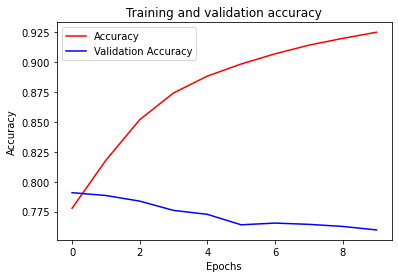

<Figure size 432x288 with 0 Axes>

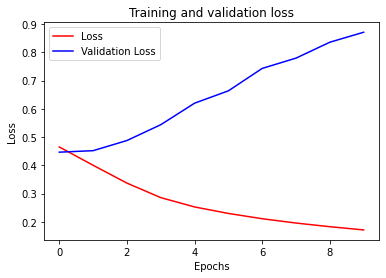

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()
plt.show()

#### GLoVe : Création de la matrice d'embedding

In [ ]:
embeddings_index = {};

with open('/content/drive/MyDrive/Twitter_Dataset/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

#### Création du réseau neuronal LSTM

En utilisant le séquentiel ([doc](https://keras.io/guides/sequential_model/)), initialiser un modèle d'apprentissage profond avec :
- une couche d'imbrication ([doc](https://keras.io/api/layers/core_layers/embedding/)) (input_dim=vocab_size+1, output_dim=embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False)
- LSTM ([doc](https://keras.io/api/layers/recurrent_layers/lstm/)) (unités=64)
- Dense ([doc](https://keras.io/api/layers/core_layers/dense/)) (unités=1)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    LSTM(units=64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Compilez votre modèle en utilisant la méthode ``.compile`` [doc](https://keras.io/api/models/model/) en utilisant les paramètres (loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Utilisez la méthode ``.summary()`` à votre modèle pour le visualiser.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 100)           41561800  
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 41,604,105
Trainable params: 42,305
Non-trainable params: 41,561,800
_________________________________________________________________


# Entraînez votre modèle

In [ ]:
num_epochs = 10

training_padded = np.array(training_sequences)
training_labels = np.array(training_labels)
testing_padded = np.array(test_sequences)
testing_labels = np.array(test_labels)

Utilisez la méthode ``.fit`` pour entraîner votre modèle.

In [ ]:
history = model.fit(training_padded,
                      training_labels,
                      epochs=num_epochs,
                      validation_data=(testing_padded, testing_labels),
                      batch_size = 256,
                      verbose=1)

print("Training Complete")

Epoch 1/10
6059/6059 [==============================] - 57s 9ms/step - loss: 0.5012 - accuracy: 0.7534 - val_loss: 0.4746 - val_accuracy: 0.7678
Epoch 2/10
6059/6059 [==============================] - 55s 9ms/step - loss: 0.4720 - accuracy: 0.7733 - val_loss: 0.4627 - val_accuracy: 0.7789
Epoch 3/10
6059/6059 [==============================] - 55s 9ms/step - loss: 0.4621 - accuracy: 0.7798 - val_loss: 0.4605 - val_accuracy: 0.7814
Epoch 4/10
6059/6059 [==============================] - 55s 9ms/step - loss: 0.4556 - accuracy: 0.7838 - val_loss: 0.4546 - val_accuracy: 0.7840
Epoch 5/10
6059/6059 [==============================] - 55s 9ms/step - loss: 0.4510 - accuracy: 0.7865 - val_loss: 0.4536 - val_accuracy: 0.7849
Epoch 6/10
6059/6059 [==============================] - 58s 10ms/step - loss: 0.4474 - accuracy: 0.7888 - val_loss: 0.4508 - val_accuracy: 0.7869
Epoch 7/10
6059/6059 [==============================] - 59s 10ms/step - loss: 0.4445 - accuracy: 0.7905 - val_loss: 0.4534 - val_

Sauvegardez votre modèle en utilisant la méthode ``.save()`` en utilisant comme paramètre le path='/content/drive/MyDrive/Twitter_Dataset/model_train.h5'.

In [ ]:
model.save('/content/drive/MyDrive/RNN_sentiment_dataset/Dataset/model_train.h5')

# Visualize your training

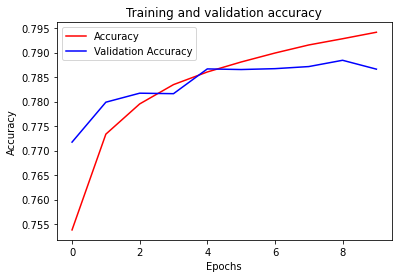

<Figure size 432x288 with 0 Axes>

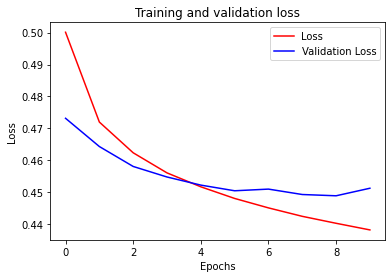

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()
plt.show()